In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
import glob
import plotly.io as pio
from astropy.io import fits
import pandas as pd
os.chdir('/Users/mmckay/phd_projects/analysis_routine/code/photometry_fns')
from isochrone_preprocessing_fns import *
from photmetry_catalog_preprocessing_fn import *
from plotting_fns import *

print(sns.__version__)
import matplotlib
print(matplotlib.__version__)
print(pd.__version__)

0.13.2
3.8.2
2.2.0


# Read in PHATTER catalog data

In [2]:
# phatter_hdu = fits.open('/Users/mmckay/phd_projects/analysis_routine/DATA/hlsp_phatter_hst_wfc3-uvis-acs-wfc-wfc3-ir_m33_f275w-f336w-f475w-f814w-f110w-f160w_v1_phot.fits')
# phatter_hdu.info()

Filename: /Users/mmckay/phd_projects/analysis_routine/DATA/hlsp_phatter_hst_wfc3-uvis-acs-wfc-wfc3-ir_m33_f275w-f336w-f475w-f814w-f110w-f160w_v1_phot.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      22   ()      
  1                1 BinTableHDU    301   21980690R x 97C   [D, D, D, D, D, D, D, D, B, D, B, D, D, D, D, D, D, D, D, D, D, D, B, D, D, D, D, D, D, D, D, D, D, D, B, D, D, D, D, D, D, D, D, D, D, D, B, D, D, D, D, D, D, D, D, D, D, D, B, D, D, D, D, D, D, D, D, D, D, D, B, D, D, D, D, D, D, D, D, D, D, D, B, B, B, B, B, B, B, B, B, B, B, B, B, K, 2A]   


## Make original catalog into a csv

In [2]:
phatter_fits_filepath = '/Users/mmckay/phd_projects/analysis_routine/DATA/hlsp_phatter_hst_wfc3-uvis-acs-wfc-wfc3-ir_m33_f275w-f336w-f475w-f814w-f110w-f160w_v1_phot.fits'
output_file = '/Users/mmckay/phd_projects/analysis_routine/DATA/phatter_f475W_f814W_table.csv'
phatter_df = make_optical_photmetry_from_hst_dataproduct(photmetry_catalog_filepath=phatter_fits_filepath, output_csv_filepath=output_file)

Adding F475W and F814W columns to table
Save catalog to CSV


## Apply dust correction and GST cuts to catalog

In [3]:
output_file = '/Users/mmckay/phd_projects/analysis_routine/DATA/phatter_f475W_f814W_table.csv'
phatter_df = reduce_optical_photmetry_table(photometry_fits_filepath=output_file, 
                                            output_filepath='/Users/mmckay/phd_projects/analysis_routine/DATA/reduced_phatter_table.csv')


/Users/mmckay/phd_projects/analysis_routine/code/photometry_fns/photmetry_catalog_preprocessing_fn.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catalog_df['f814w_vega_ecorr'] = catalog_df['f814w_vega'] + 0.596*0.17
/Users/mmckay/phd_projects/analysis_routine/code/photometry_fns/photmetry_catalog_preprocessing_fn.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catalog_df['f475w_vega_ecorr'] = catalog_df['f475w_vega'] + 1.212*0.17
/Users/mmckay/phd_projects/analysis_routine/code/photometry_fns/

# Interpolation of phatter catalog

In [2]:
catalog_csv_filepath = '/Users/mmckay/phd_projects/analysis_routine/DATA/reduced_phatter_table.csv'
isochrone_csv_filepath = '/Users/mmckay/phd_projects/analysis_routine/DATA/phatter_RGB_isochrone_tables/RGB_AGB_isochrone_table.csv'
output_filepath = '/Users/mmckay/phd_projects/analysis_routine/DATA/interpolated_phatter_rgb_agb_selection.csv'

interpolated_phatter_rgb_agb = catalog_linear_interpolation(catalog_csv_filepath, 
                                                            isochrone_csv_filepath, 
                                                            output_filepath, 
                                                            savefile=True)

Running LinearNDInterpolator
Dropping fill values if any 25781
Saving the photometry catalog with interpolated values as /Users/mmckay/phd_projects/analysis_routine/DATA/interpolated_phatter_rgb_agb_selection.csv


# Plot results

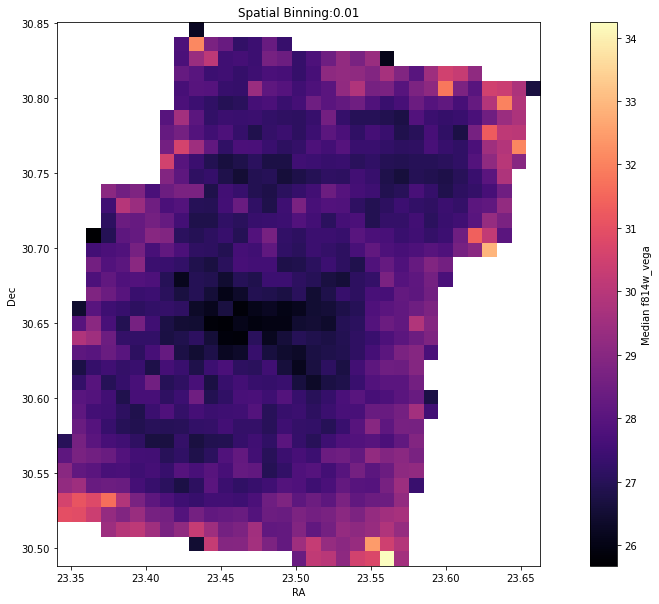

<Figure size 432x288 with 0 Axes>

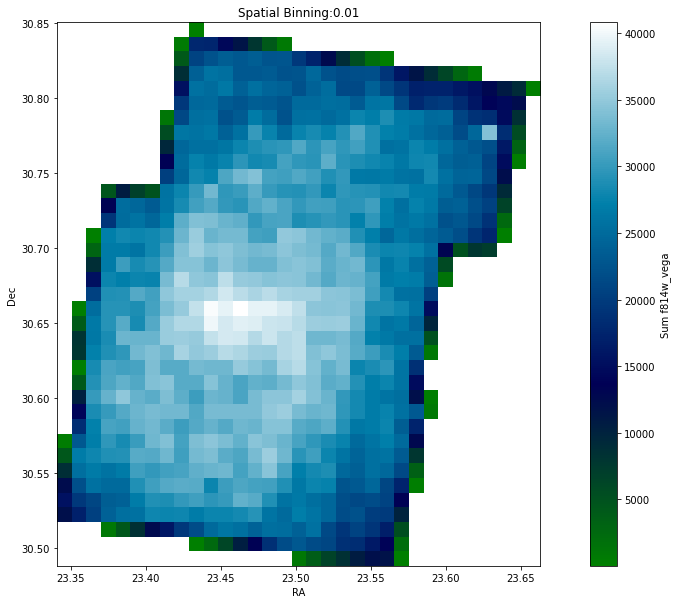

<Figure size 432x288 with 0 Axes>

In [4]:
photometry_binned_spatial_map(catalog_csv_filepath = '/Users/mmckay/phd_projects/analysis_routine/DATA/phatter_f475W_f814W_table.csv', 
                              z_col='f814w_vega', 
                              output_dir='/Users/mmckay/phd_projects/analysis_routine/FIGURES', 
                              catalog_name='original_phatter_catalog')

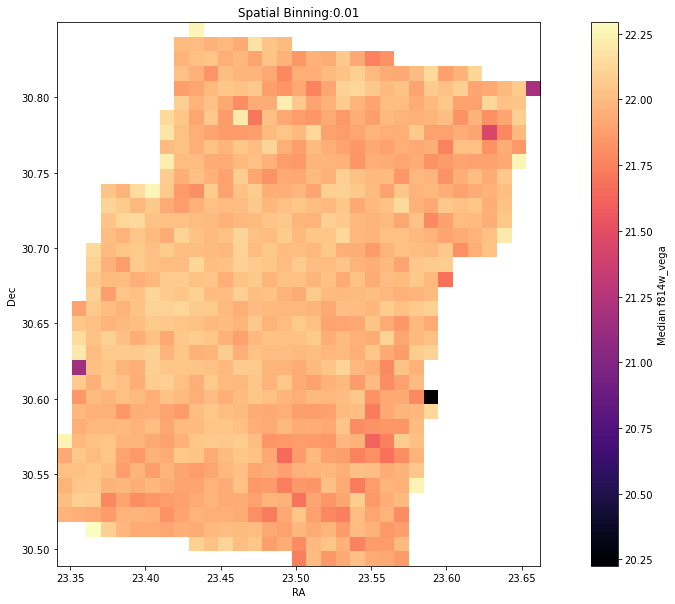

<Figure size 432x288 with 0 Axes>

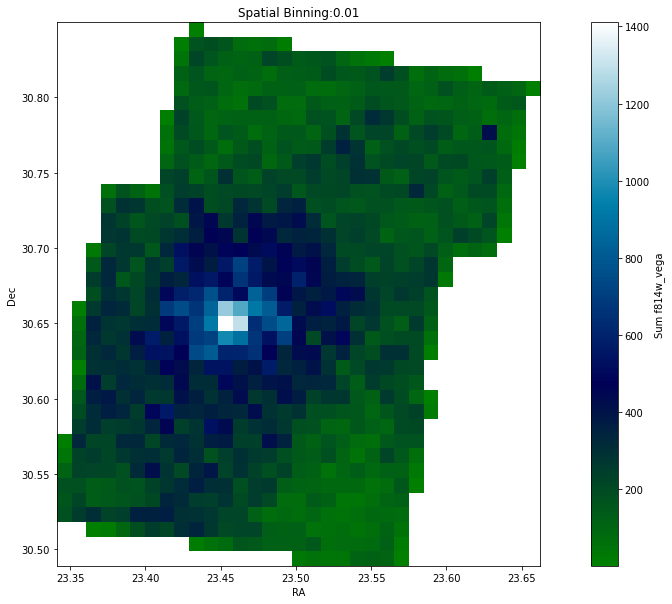

<Figure size 432x288 with 0 Axes>

In [3]:
# Plot binned spatial map of the photometry
photometry_binned_spatial_map(catalog_csv_filepath = '/Users/mmckay/phd_projects/analysis_routine/DATA/reduced_phatter_table.csv', 
                              z_col='f814w_vega', 
                              output_dir='/Users/mmckay/phd_projects/analysis_routine/FIGURES', 
                              catalog_name='reduced_phatter_rgb_agb')

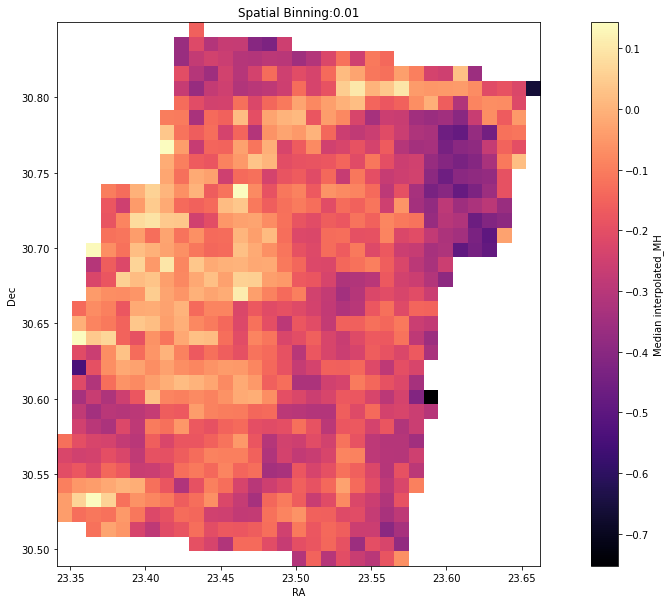

<Figure size 432x288 with 0 Axes>

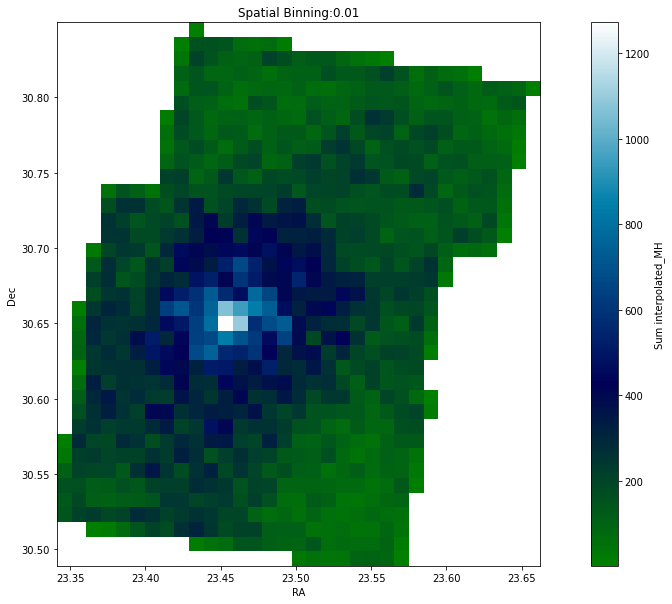

<Figure size 432x288 with 0 Axes>

In [2]:
# Plot interrpolated values 
photometry_binned_spatial_map(catalog_csv_filepath = '/Users/mmckay/phd_projects/analysis_routine/DATA/Interpolated_phatter_rgb_agb_selection.csv', 
                              z_col='interpolated_MH', 
                              output_dir='/Users/mmckay/phd_projects/analysis_routine/FIGURES', 
                              catalog_name='phatter_rgb_agb')


# Apply Gregrsen photometry selection box

Saved RGB selection to /Users/mmckay/phd_projects/analysis_routine/DATA/test_modules/phatter_rgb_selection.csv
Saved CMD to /Users/mmckay/phd_projects/analysis_routine/FIGURES/phatter_cmd_plot.jpeg


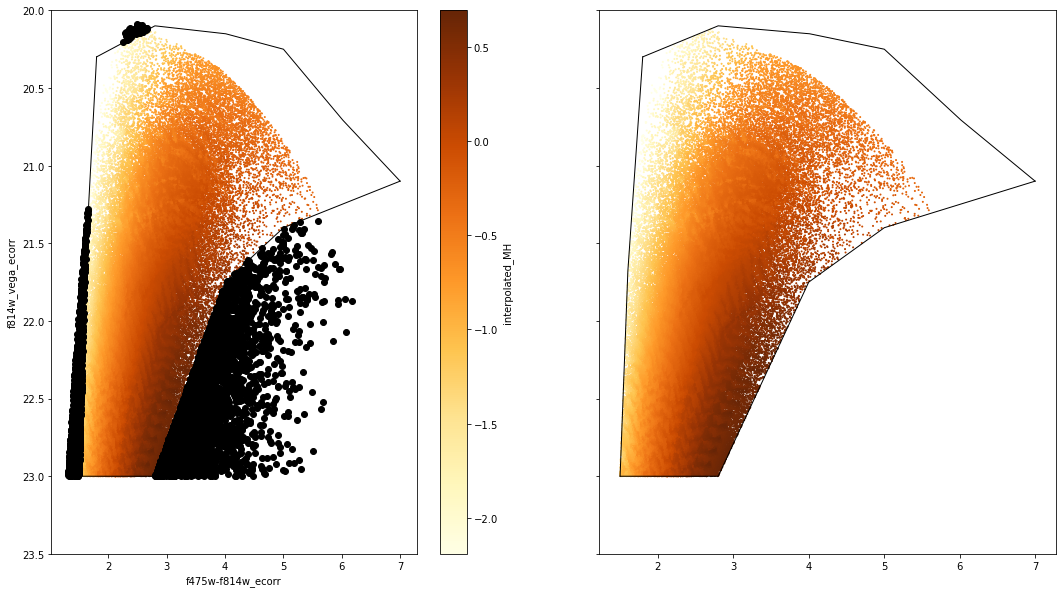

<Figure size 432x288 with 0 Axes>

In [4]:
csv_filepath = '/Users/mmckay/phd_projects/analysis_routine/DATA/interpolated_phatter_rgb_agb_selection.csv'
f814w_col = 'f814w_vega_ecorr'
f475w_f814_col = 'f475w-f814w_ecorr'
z_col = 'interpolated_MH'
savefile_path = '/Users/mmckay/phd_projects/analysis_routine/DATA/test_modules/phatter_rgb_selection.csv'
savefig_filepath = '/Users/mmckay/phd_projects/analysis_routine/FIGURES/phatter_cmd_plot.jpeg'

plot_CMD(csv_filepath, f814w_col, f475w_f814_col, z_col, savefile=True, apply_phat_rgb_MH_selection=True, save_rgb_selection=True, save_filepath=savefile_path, savefig_filepath=savefig_filepath)

# Plot CMD, MDF, stellar density and M/H all together 

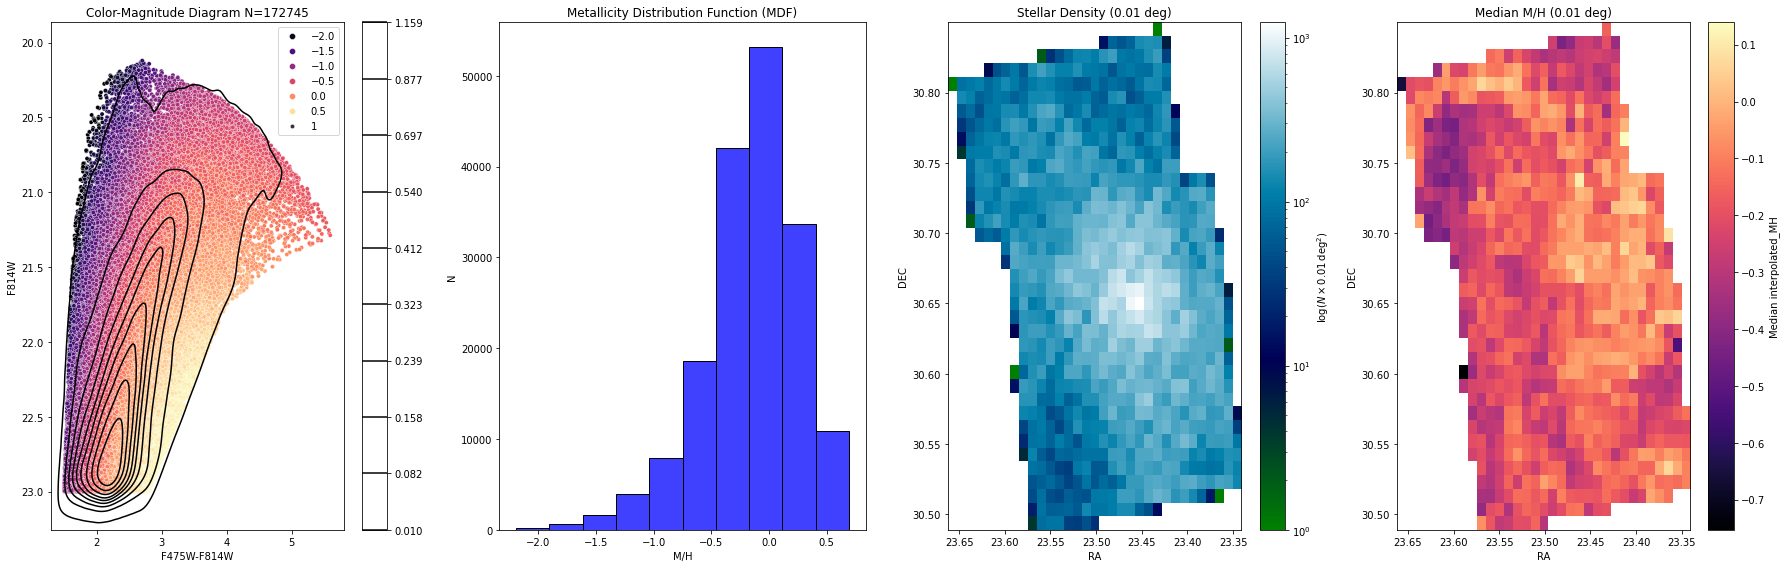

In [4]:
phatter_rgb_gregersen_selection_df = pd.read_csv('/Users/mmckay/phd_projects/analysis_routine/DATA/test_modules/phatter_rgb_selection.csv')
median_arr, stellar_density_arr = plot_cmd_mdf_spatial(phatter_rgb_gregersen_selection_df, 
                     savefig_filepath='/Users/mmckay/phd_projects/analysis_routine/FIGURES/phatter_cmd_mdf_spatial_gregersen_box.jpeg', 
                     bin_size_deg=0.01, z_col='interpolated_MH')

In [ ]:
phatter_rgb_gregersen_selection_df = pd.read_csv('/Users/mmckay/phd_projects/analysis_routine/DATA/test_modules/phatter_rgb_selection.csv')
median_arr, stellar_density_arr = plot_cmd_mdf_spatial(phatter_rgb_gregersen_selection_df, 
                     savefig_filepath='/Users/mmckay/phd_projects/analysis_routine/FIGURES/phatter_cmd_mdf_spatial_gregersen_box.jpeg', 
                     bin_size_deg=0.01, z_col='interpolated_MH')

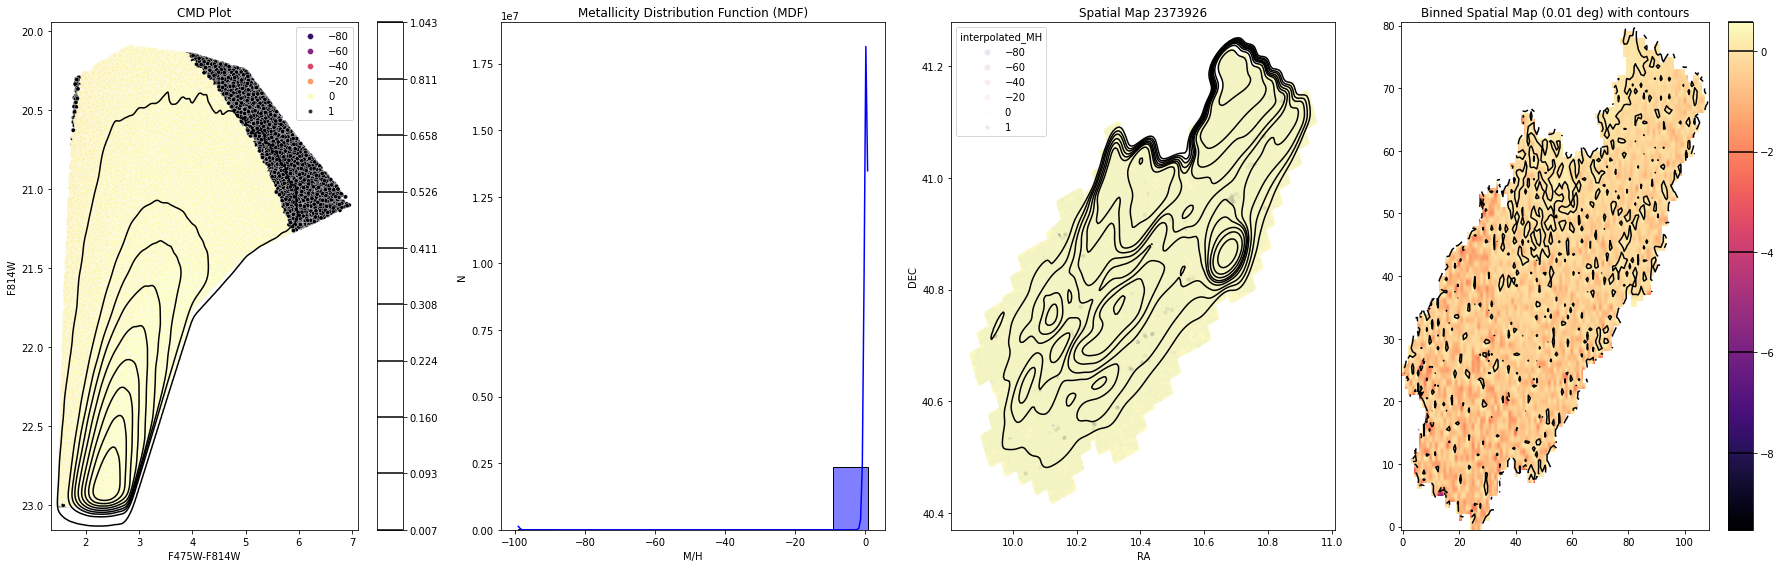

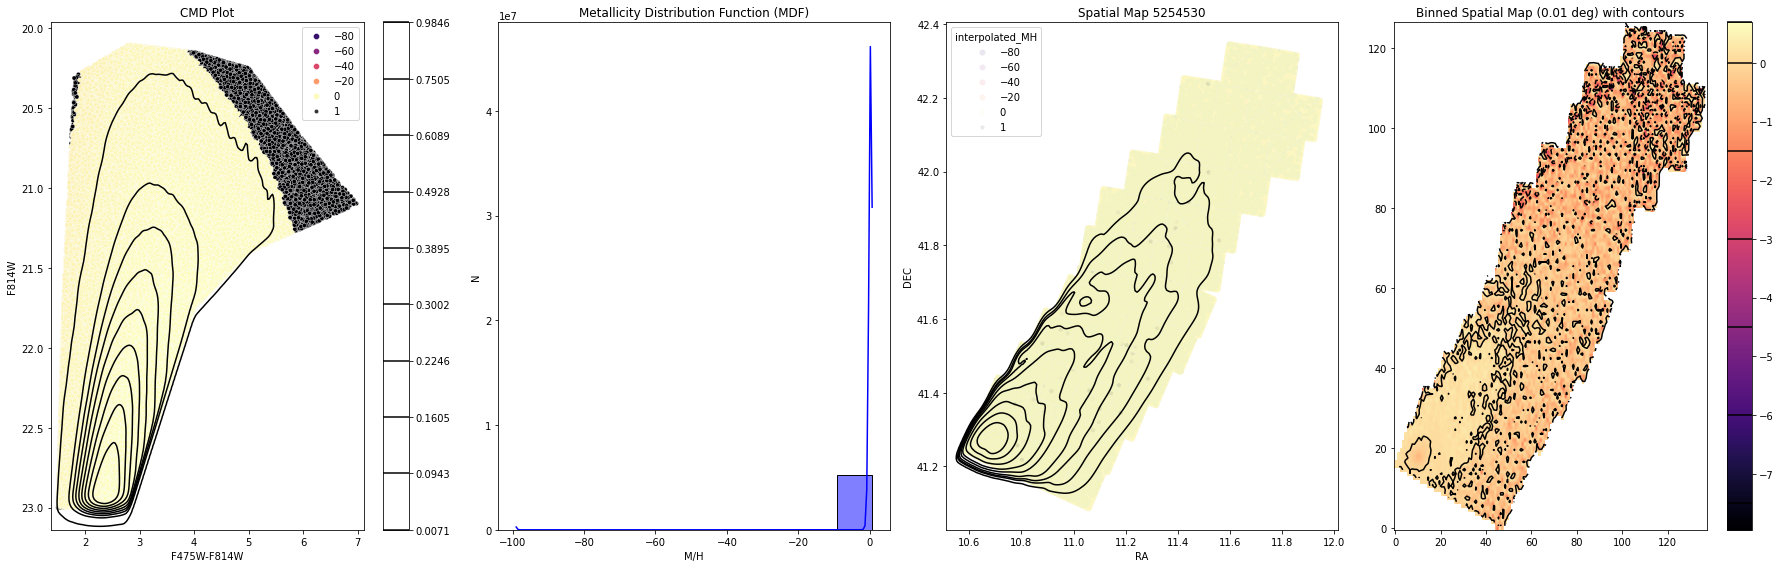

In [6]:
#PHAST
# phast_rgb_gregersen_selection_df = pd.read_csv('/Users/mmckay/phd_projects/analysis_routine/DATA/Interpolated_phast_rgb_agb_selection.csv')
# plot_cmd_mdf_spatial(phast_rgb_gregersen_selection_df, 
#                      savefig_filepath='/Users/mmckay/phd_projects/analysis_routine/FIGURES/phast_cmd_mdf_spatial_gregersen_box.jpeg', 
#                      bin_size_deg=0.01)

# #PHAT
# phat_rgb_gregersen_selection_df = pd.read_csv('/Users/mmckay/phd_projects/analysis_routine/DATA/Interpolated_phat_rgb_agb_selection.csv')
# plot_cmd_mdf_spatial(phat_rgb_gregersen_selection_df, 
#                      savefig_filepath='/Users/mmckay/phd_projects/analysis_routine/FIGURES/phat_cmd_mdf_spatial_gregersen_box.jpeg', 
#                      bin_size_deg=0.01)

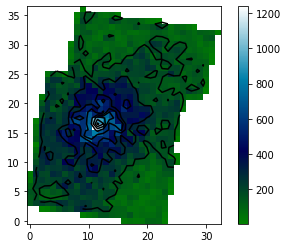

In [11]:
# Assuming median_values is your 2D array
im = plt.imshow(stellarr_density_arr.T, cmap='ocean', origin='lower')
plt.colorbar(im)

# Add a contour plot
contours = plt.contour(stellarr_density_arr.T, colors='black', origin='lower', levels=8)
# plt.clabel(contours, inline=False, fontsize=8)median_arr

plt.show()